In [108]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [109]:
#import the dataset:
from keras.datasets import mnist

#read in the data:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [110]:
X_train.shape

(60000, 28, 28)

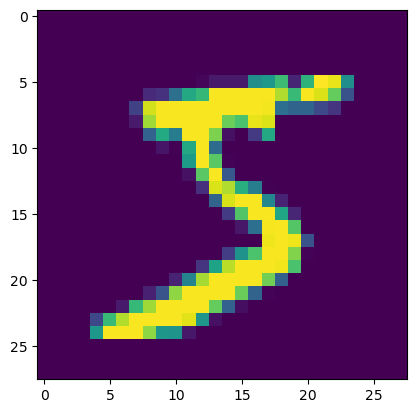

In [111]:
#display an imgame in X_train
plt.imshow(X_train[0]);

we need to flatten the image cause its ConventionalNeural Network into a dimensional vector with each size of 1*(28 * 28) = 1*784

In [112]:
#flatten the images into one dimensional vector:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

Since pixel can range from 0 to 255, lets normalize the vector to between 0 and 1

In [113]:
#noramlize inputs from 0 - 255 to 0 -1;
X_train = X_train/255
X_test = X_test/255

Now, lets use to_categorical() to divide the target varailble into categories

In [114]:
#One hot encode output:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
num_classes

10

## Lets build the Neural Network

In [115]:
def classification_model(num_classes):
    # Define the correct input shape as a tuple
    input_shape = (num_pixels,)  # Replace num_pixels with the actual number of input features

    # Create the model
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer with num_classes units

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Let Train and Teest the Model

In [116]:
# build the model
model = classification_model(num_classes)

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 6s - loss: 0.2466 - accuracy: 0.9278 - val_loss: 0.1314 - val_accuracy: 0.9606 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 5s - loss: 0.1068 - accuracy: 0.9680 - val_loss: 0.0900 - val_accuracy: 0.9715 - 5s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 6s - loss: 0.0748 - accuracy: 0.9768 - val_loss: 0.0895 - val_accuracy: 0.9709 - 6s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.0589 - accuracy: 0.9812 - val_loss: 0.0793 - val_accuracy: 0.9747 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 6s - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.0934 - val_accuracy: 0.9716 - 6s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.0808 - val_accuracy: 0.9752 - 5s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 6s - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0809 - val_accuracy: 0.9771 - 6s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 5s - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.0865 - val_accuracy: 0.9779 - 5s/epoch - 3ms/step
Epoch 9/

In [117]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))   

Accuracy: 0.9775000214576721% 
 Error: 0.02249997854232788


lets save the model

In [106]:
model.save('classification_model.h5')

To use it again:

In [107]:
from keras.models import load_model

#import the pretrained model
pretrained_model = load_model('classification_model.h5')